# AIRBNB PRICES IN EUROPEAN CITIES ANALYSES

I am going to perform an end-to-end analysis of the data set "Airbnb prices in european cities" in order to creat a Linear Regression Model that can help us predict prices. The dataset provides a comprehensive look at Airbnb prices in some of the most popular European cities.


We will study how the different features affect to the prices of the AIRBNB


#### IMPORT NECESSARY LIBRARIES¶


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os, glob

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### IMPORT DATASETS


In [7]:
amsterdam_weekdays = pd.read_csv('amsterdam_weekdays.csv')
amsterdam_weekends = pd.read_csv('amsterdam_weekends.csv')
athens_weekdays = pd.read_csv('athens_weekdays.csv')
athens_weekends = pd.read_csv('athens_weekends.csv')
barcelona_weekdays = pd.read_csv('barcelona_weekdays.csv')
barcelona_weekends = pd.read_csv('barcelona_weekends.csv')
berlin_weekdays = pd.read_csv('berlin_weekdays.csv')
berlin_weekends = pd.read_csv('berlin_weekends.csv')
budapest_weekdays = pd.read_csv('budapest_weekdays.csv')
budapest_weekends = pd.read_csv('budapest_weekends.csv')
lisbon_weekdays = pd.read_csv('lisbon_weekdays.csv')
lisbon_weekends = pd.read_csv('lisbon_weekends.csv')
london_weekdays = pd.read_csv('london_weekdays.csv')
london_weekends = pd.read_csv('london_weekends.csv')
paris_weekdays = pd.read_csv('paris_weekdays.csv')
paris_weekends = pd.read_csv('paris_weekends.csv')
rome_weekdays = pd.read_csv('rome_weekdays.csv')
rome_weekends = pd.read_csv('rome_weekends.csv')
vienna_weekdays = pd.read_csv('vienna_weekdays.csv')
vienna_weekends = pd.read_csv('vienna_weekends.csv')

Combining the 'weekdays' and 'weekend' datasets of the individual datasets into 1 dataset for a particular city

In [8]:
def combine(csv_1,col_1,csv_2,col_2,city):     
    csv_1['week time'] = col_1
    csv_2['week time'] = col_2
    csv_1.drop(columns = ['Unnamed: 0'],inplace=True)
    csv_2.drop(columns = ['Unnamed: 0'],inplace=True)
    merged = pd.concat([csv_1, csv_2])
    merged['city'] = city
    return merged

In [9]:
amsterdam = combine(amsterdam_weekdays,'weekdays',amsterdam_weekends,'weekends','amsterdam')
athens = combine(athens_weekdays,'weekdays',athens_weekends,'weekends','athens')
barcelona = combine(barcelona_weekdays,'weekdays',barcelona_weekends,'weekends','barcelona')
berlin = combine(berlin_weekdays,'weekdays',berlin_weekends,'weekends','berlin')
budapest = combine(budapest_weekdays,'weekdays',budapest_weekends,'weekends','budapest')
lisbon = combine(lisbon_weekdays,'weekdays',lisbon_weekends,'weekends','lisbon')
london = combine(london_weekdays,'weekdays',london_weekends,'weekends','london')
paris = combine(paris_weekdays,'weekdays',paris_weekends,'weekends','paris')
rome = combine(rome_weekdays,'weekdays',rome_weekends,'weekends','rome')
vienna = combine(vienna_weekdays,'weekdays',vienna_weekends,'weekends','vienna')

In [10]:
cities_names = ['amsterdam', 'athens', 'barcelona', 'berlin', 'budapest', 'lisbon', 'london', 'paris', 'rome', 'vienna']
cities = [amsterdam, athens, barcelona, berlin, budapest, lisbon, london, paris, rome, vienna]

We utilized the "concat" function of the pandas library to combine data from all cities in a vertical manner, with the aim of converting them into a unified dataset

In [11]:
data = pd.concat(cities, ignore_index=True) 

In [12]:
data

realSum        room_type  room_shared  room_private  \
0      194.033698     Private room        False          True   
1      344.245776     Private room        False          True   
2      264.101422     Private room        False          True   
3      433.529398     Private room        False          True   
4      485.552926     Private room        False          True   
...           ...              ...          ...           ...   
51702  715.938574  Entire home/apt        False         False   
51703  304.793960  Entire home/apt        False         False   
51704  637.168969  Entire home/apt        False         False   
51705  301.054157     Private room        False          True   
51706  133.230489     Private room        False          True   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                  2.0              False      1    0                10.0   
1                  4.0              False      0    0                 8.0   
2                  2.0              False      0    1                 9.0   
3                  4.0              False      0    1                 9.0   
4                  2.0               True      0    0                10.0   
...                ...                ...    ...  ...                 ...   
51702              6.0              False      0    1                10.0   
51703              2.0              False      0    0                 8.0   
51704              2.0              False      0    0                10.0   
51705              2.0              False      0    0                10.0   
51706              4.0               True      1    0                10.0   

       guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                            93.0  ...  5.022964    2.539380   78.690379   
1                            85.0  ...  0.488389    0.239404  631.176378   
2                            87.0  ...  5.748312    3.651621   75.275877   
3                            90.0  ...  0.384862    0.439876  493.272534   
4                            98.0  ...  0.544738    0.318693  552.830324   
...                           ...  ...       ...         ...         ...   
51702                       100.0  ...  0.530181    0.135447  219.402478   
51703                        86.0  ...  0.810205    0.100839  204.970121   
51704                        93.0  ...  0.994051    0.202539  169.073402   
51705                        87.0  ...  3.044100    0.287435  109.236574   
51706                        93.0  ...  1.263932    0.480903  150.450381   

       attr_index_norm  rest_index  rest_index_norm       lng       lat  \
0             4.166708   98.253896         6.846473   4.90569  52.41772   
1            33.421209  837.280757        58.342928   4.90005  52.37432   
2             3.985908   95.386955         6.646700   4.97512  52.36103   
3            26.119108  875.033098        60.973565   4.89417  52.37663   
4            29.272733  815.305740        56.811677   4.90051  52.37508   
...                ...         ...              ...       ...       ...   
51702        15.712158  438.756874        10.604584  16.37940  48.21136   
51703        14.678608  342.182813         8.270427  16.38070  48.20296   
51704        12.107921  282.296424         6.822996  16.38568  48.20460   
51705         7.822803  158.563398         3.832416  16.34100  48.19200   
51706        10.774264  225.247293         5.444140  16.39066  48.20811   

       week time       city  
0       weekdays  amsterdam  
1       weekdays  amsterdam  
2       weekdays  amsterdam  
3       weekdays  amsterdam  
4       weekdays  amsterdam  
...          ...        ...  
51702   weekends     vienna  
51703   weekends     vienna  
51704   weekends     vienna  
51705   weekends     vienna  
51706   weekends     vienna  

[51707 rows x 21 columns]

In [173]:
data.to_excel('europe_data.xlsx')

#  EXPLORING & CLEANING THE DATA

After importing the data we can take a quick look into it in order to see and understand the columns and their values.

In [13]:
data.head()

realSum     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room        False          True              2.0   
1  344.245776  Private room        False          True              4.0   
2  264.101422  Private room        False          True              2.0   
3  433.529398  Private room        False          True              4.0   
4  485.552926  Private room        False          True              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      1    0                10.0   
1              False      0    0                 8.0   
2              False      0    1                 9.0   
3              False      0    1                 9.0   
4               True      0    0                10.0   

   guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                        93.0  ...  5.022964    2.539380   78.690379   
1                        85.0  ...  0.488389    0.239404  631.176378   
2                        87.0  ...  5.748312    3.651621   75.275877   
3                        90.0  ...  0.384862    0.439876  493.272534   
4                        98.0  ...  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  week time  \
0         4.166708   98.253896         6.846473  4.90569  52.41772   weekdays   
1        33.421209  837.280757        58.342928  4.90005  52.37432   weekdays   
2         3.985908   95.386955         6.646700  4.97512  52.36103   weekdays   
3        26.119108  875.033098        60.973565  4.89417  52.37663   weekdays   
4        29.272733  815.305740        56.811677  4.90051  52.37508   weekdays   

        city  
0  amsterdam  
1  amsterdam  
2  amsterdam  
3  amsterdam  
4  amsterdam  

[5 rows x 21 columns]

-realSum: the full price of accommodation for two people and two nights in EUR

-room_type: the type of the accommodation

-room_shared: dummy variable for shared rooms

-room_private: dummy variable for private rooms

-person_capacity: the maximum number of guests

-host_is_superhost: dummy variable for superhost status

-multi: dummy variable if the listing belongs to hosts with 2-4 offers

-biz: dummy variable if the listing belongs to hosts with more than 4 offers

-cleanliness_rating: cleanliness rating

-guest_satisfaction_overall: overall rating of the listing

-bedrooms: number of bedrooms (0 for studios)

-dist: distance from city centre in km

-metro_dist: distance from nearest metro station in km

-attr_index: attraction index of the listing location

-attr_index_norm: normalised attraction index (0-100)

-rest_index: restaurant index of the listing location

-attr_index_norm: normalised restaurant index (0-100)

-lng: longitude of the listing location

-lat: latitude of the listing location

-city: city of the listing location

-weekend: data for weekend or weekday. Now it's string variable, let's convert it to dummy variable: 1 for weekend, o for weekday

In [14]:
data.isna().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
week time                     0
city                          0
dtype: int64

There are no null or NaN values in the whole dataset

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

In [17]:
data.describe().T

count        mean         std        min  \
realSum                     51707.0  279.879591  327.948386  34.779339   
person_capacity             51707.0    3.161661    1.298545   2.000000   
multi                       51707.0    0.291353    0.454390   0.000000   
biz                         51707.0    0.350204    0.477038   0.000000   
cleanliness_rating          51707.0    9.390624    0.954868   2.000000   
guest_satisfaction_overall  51707.0   92.628232    8.945531  20.000000   
bedrooms                    51707.0    1.158760    0.627410   0.000000   
dist                        51707.0    3.191285    2.393803   0.015045   
metro_dist                  51707.0    0.681540    0.858023   0.002301   
attr_index                  51707.0  294.204105  224.754123  15.152201   
attr_index_norm             51707.0   13.423792    9.807985   0.926301   
rest_index                  51707.0  626.856696  497.920226  19.576924   
rest_index_norm             51707.0   22.786177   17.804096   0.592757   
lng                         51707.0    7.426068    9.799725  -9.226340   
lat                         51707.0   45.671128    5.249263  37.953000   

                                   25%         50%         75%           max  
realSum                     148.752174  211.343089  319.694287  18545.450285  
person_capacity               2.000000    3.000000    4.000000      6.000000  
multi                         0.000000    0.000000    1.000000      1.000000  
biz                           0.000000    0.000000    1.000000      1.000000  
cleanliness_rating            9.000000   10.000000   10.000000     10.000000  
guest_satisfaction_overall   90.000000   95.000000   99.000000    100.000000  
bedrooms                      1.000000    1.000000    1.000000     10.000000  
dist                          1.453142    2.613538    4.263077     25.284557  
metro_dist                    0.248480    0.413269    0.737840     14.273577  
attr_index                  136.797385  234.331748  385.756381   4513.563486  
attr_index_norm               6.380926   11.468305   17.415082    100.000000  
rest_index                  250.854114  522.052783  832.628988   6696.156772  
rest_index_norm               8.751480   17.542238   32.964603    100.000000  
lng                          -0.072500    4.873000   13.518825     23.786020  
lat                          41.399510   47.506690   51.471885     52.641410

In [18]:
data['city'].value_counts()

london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelona    2833
berlin       2484
amsterdam    2080
Name: city, dtype: int64

The city with the most listings in this dataset is London with 9993 data entries, which is almost 20% of the dataset.

In [20]:
listing_counts = data.groupby('city').realSum.count().reset_index()
superhost_count = data.groupby('city').host_is_superhost.sum().reset_index()
superhost_count['abbr'] = superhost_count.city.apply(lambda x: x[:3].upper())

listing_superhost_count = pd.merge(listing_counts, superhost_count).sort_values('realSum', ascending=False)
listing_superhost_count['perc'] = listing_superhost_count.apply(lambda row:
                                                                round((row['host_is_superhost'] / row['realSum'] * 100), 1), axis=1)
listing_superhost_count['perc'] = listing_superhost_count.perc.apply(lambda x: str(x)+"%")

listing_superhost_count

city  realSum  host_is_superhost abbr   perc
6     london     9993               1573  LON  15.7%
8       rome     9027               2949  ROM  32.7%
7      paris     6688                941  PAR  14.1%
5     lisbon     5763               1233  LIS  21.4%
1     athens     5280               2263  ATH  42.9%
4   budapest     4022               1524  BUD  37.9%
9     vienna     3537               1005  VIE  28.4%
2  barcelona     2833                514  BAR  18.1%
3     berlin     2484                639  BER  25.7%
0  amsterdam     2080                591  AMS  28.4%

As we can see in the interquartile range and the Description table of the dataset, the majority of the prices range from $149 to $320 while the IQR is $171.

In [21]:
data.room_type.value_counts(normalize = True)

Entire home/apt    0.631404
Private room       0.361518
Shared room        0.007078
Name: room_type, dtype: float64

Most of objects are entire home/apt (63%), then 36% are private room, and only 0,7% of objects are shared room

In [22]:
data.pivot_table(['cleanliness_rating', 'guest_satisfaction_overall', 'rest_index', 'attr_index'], ['city'], aggfunc = 'mean')

attr_index  cleanliness_rating  guest_satisfaction_overall  \
city                                                                    
amsterdam  269.064730            9.465865                   94.514423   
athens     152.312177            9.638447                   95.003598   
barcelona  460.767010            9.291564                   91.109072   
berlin     110.223416            9.461755                   94.323671   
budapest   212.463383            9.477374                   94.585281   
lisbon     221.970147            9.370640                   91.093875   
london     295.448532            9.175023                   90.645652   
paris      374.186582            9.263606                   92.037530   
rome       470.578123            9.514678                   93.122300   
vienna     122.356055            9.472434                   93.731128   

            rest_index  
city                    
amsterdam   335.712818  
athens      218.807826  
barcelona   881.070446  
berlin      146.875822  
budapest    423.982306  
lisbon      560.224296  
london      627.541611  
paris       818.768769  
rome       1151.413675  
vienna      176.361199

- Rome and Barcelona house the most appealing attractions, while Berlin and Vienna have the least attractive ones.

- Athens and Rome stand out as having the cleanest objects, whereas London and Paris have the least clean objects.

- In terms of satisfaction, Athens and Budapest have the most content objects, whereas London and Lisbon have the least satisfied objects.

- The finest restaurants are situated in Rome and Barcelona, with Vienna and Berlin having the poorest ones.

In [24]:
data.groupby(['city', 'week time']).realSum.count()

city       week time
amsterdam  weekdays     1103
           weekends      977
athens     weekdays     2653
           weekends     2627
barcelona  weekdays     1555
           weekends     1278
berlin     weekdays     1284
           weekends     1200
budapest   weekdays     2074
           weekends     1948
lisbon     weekdays     2857
           weekends     2906
london     weekdays     4614
           weekends     5379
paris      weekdays     3130
           weekends     3558
rome       weekdays     4492
           weekends     4535
vienna     weekdays     1738
           weekends     1799
Name: realSum, dtype: int64

In [25]:
data.groupby(['city', 'week time']).realSum.mean()

city       week time
amsterdam  weekdays     545.020526
           weekends     604.828018
athens     weekdays     155.866982
           weekends     147.580456
barcelona  weekdays     288.391667
           weekends     300.277940
berlin     weekdays     240.220422
           weekends     249.252516
budapest   weekdays     168.429367
           weekends     185.120628
lisbon     weekdays     236.345459
           weekends     240.044051
london     weekdays     360.230348
           weekends     364.389747
paris      weekdays     398.786678
           weekends     387.028589
rome       weekdays     201.618053
           weekends     209.130063
vienna     weekdays     240.384834
           weekends     242.739524
Name: realSum, dtype: float64

In [26]:
table = data.groupby(['city', 'room_type']).realSum.mean().reset_index()

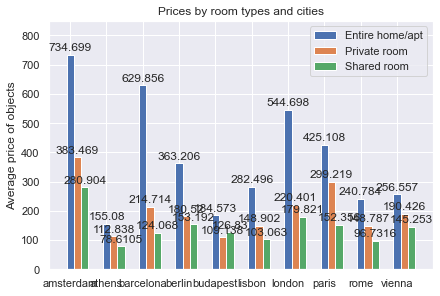

In [27]:
cities = table.city.unique()
room_types = table.room_type.unique()
cities_dict = {}
for r_type in room_types:
    t = tuple(table.loc[table['room_type'] == r_type, 'realSum'])
    cities_dict[r_type] = t

x = np.arange(len(cities))
width = 0.2
multiplier = 1

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in cities_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2)
    multiplier += 1

ax.set_ylabel('Average price of objects')
ax.set_title('Prices by room types and cities')
ax.set_xticks(x + width, cities)
ax.legend(loc='upper right')
ax.set_ylim(0, 850)

plt.show()

The most expensive city is Amsterdam, followed by London and Paris. The cheapest cities are Athens and Budapest. 

## NUMERIC FEATURES

In [28]:
list(data.select_dtypes(include=['int64','float64']))

['realSum',
 'person_capacity',
 'multi',
 'biz',
 'cleanliness_rating',
 'guest_satisfaction_overall',
 'bedrooms',
 'dist',
 'metro_dist',
 'attr_index',
 'attr_index_norm',
 'rest_index',
 'rest_index_norm',
 'lng',
 'lat']

In [30]:
numerical_features = list(data.select_dtypes(include=['int64','float64']).columns[i] for i in [1,4,5,6,7,8,9,10,11,12,13,14])

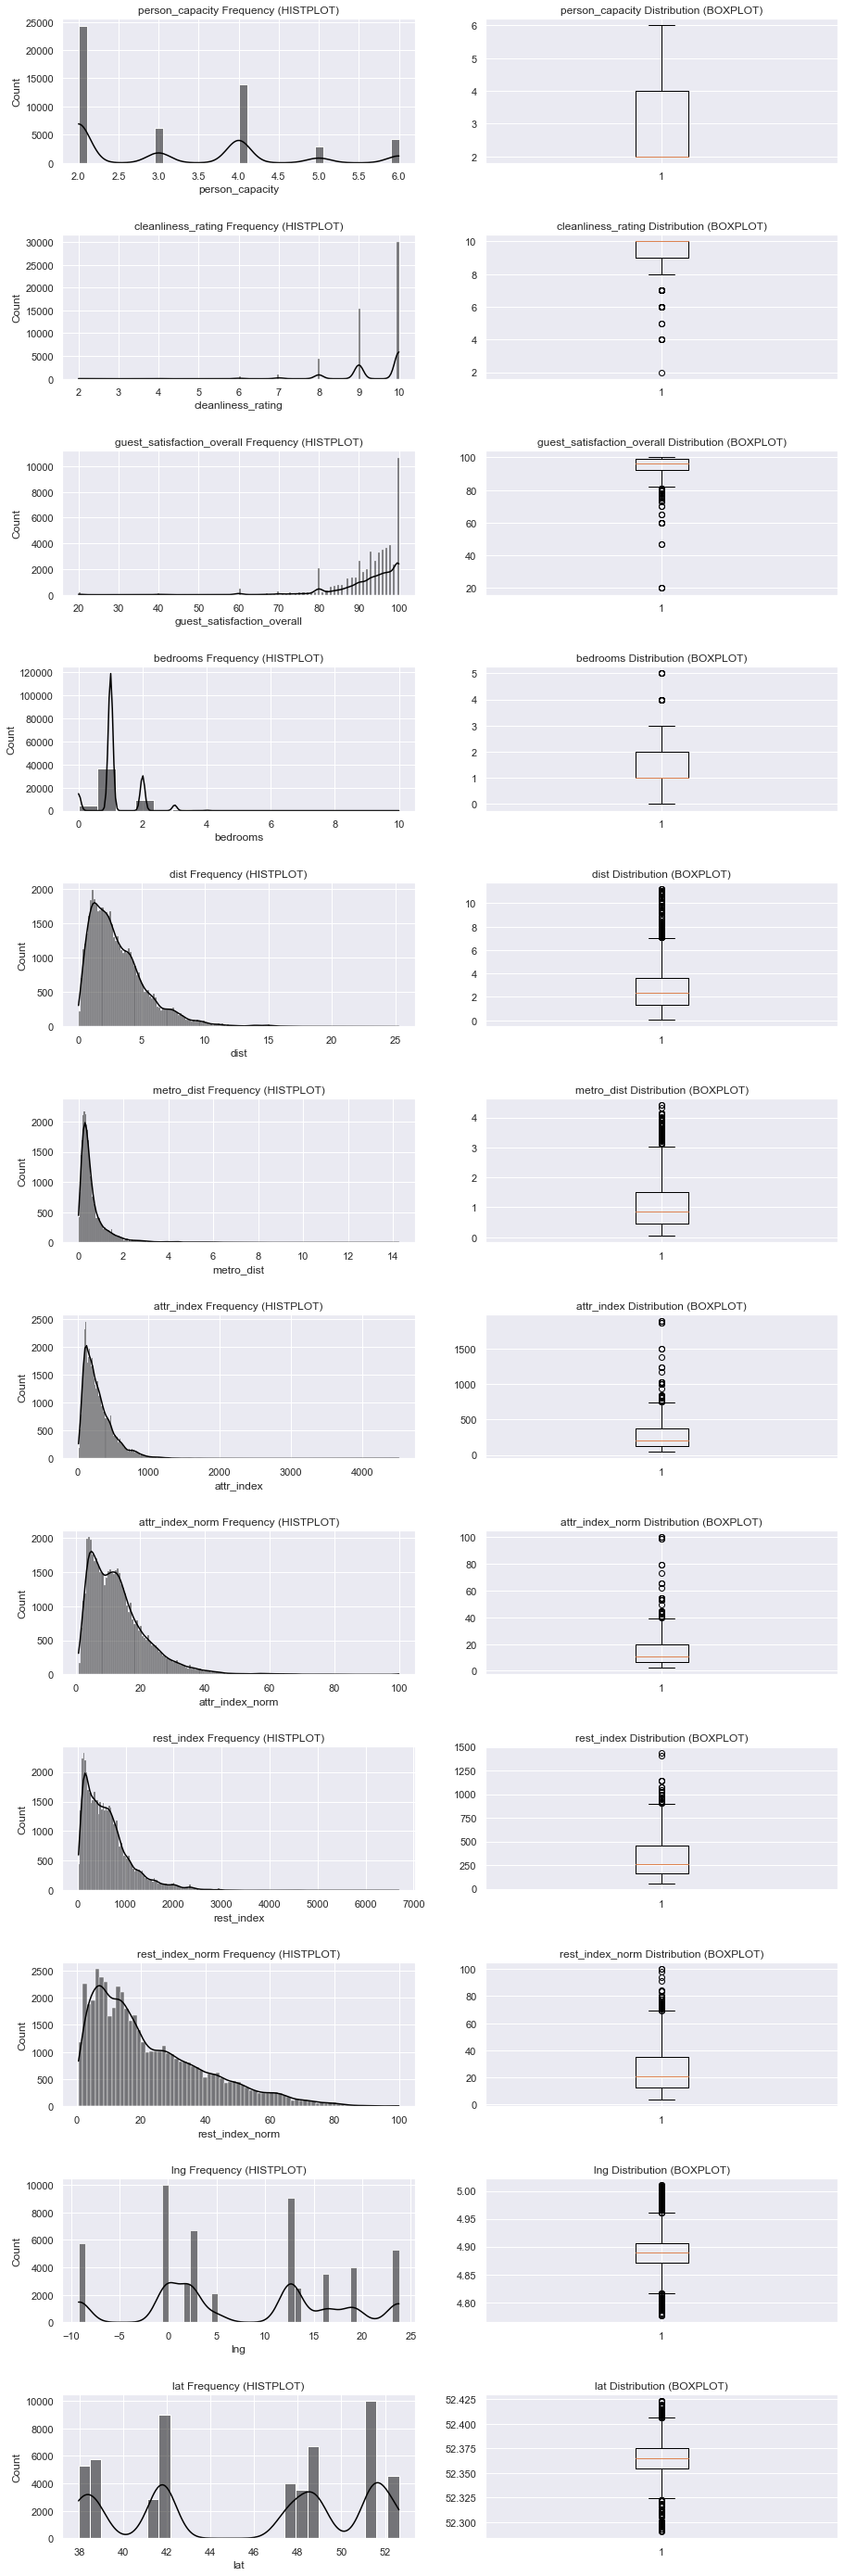

In [31]:
numerical_features = list(data.select_dtypes(include=['int64','float64']).columns[i] for i in [1,4,5,6,7,8,9,10,11,12,13,14])
def plotter_3(feature,color,row):
    sns.histplot(data=data[feature],ax=axes[row,0],kde=True,color=color,line_kws={'color': 'Yellow'})
    axes[row,0].set_title(str(feature)+" Frequency (HISTPLOT)")
    axes[row,1].boxplot(amsterdam[feature])
    axes[row,1].set_title(str(feature)+" Distribution (BOXPLOT)")
    
    
plt.figure
fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(15, 50))
for i in range(12):
    plotter_3( numerical_features[i] , '#000000' , i)


plt.subplots_adjust(hspace=0.50)
plt.show()

The distribution of cleanliness ratings among the listings is left-skewed, as can be observed from the boxplot. The majority of the ratings fall in the range of 8-10.

The majority of the listings are situated within 7 kilometers of the city center, with only a small number located between 7-10 kilometers away.

When it comes to proximity to the nearest metro station, most of the listings are located within 3 kilometers, and there are relatively few listings situated between 3-5 kilometers away.

##### Highest Prices

In [32]:
highest_price = data.sort_values('realSum', ascending=False).head(50)

highest_price[['city','room_type','person_capacity','realSum', 'lng', 'lat']].head(10)

city        room_type  person_capacity       realSum       lng  \
3590   athens  Entire home/apt              2.0  18545.450285  23.73200   
34803   paris  Entire home/apt              2.0  16445.614689   2.29772   
24348  london  Entire home/apt              3.0  15499.894165  -0.13038   
48380  vienna     Private room              2.0  13664.305916  16.34356   
50787  vienna     Private room              2.0  13656.358834  16.34356   
48215  vienna  Entire home/apt              4.0  12942.991375  16.38614   
30626  london  Entire home/apt              6.0  12937.275101  -0.14658   
31635  london     Private room              2.0  12929.513864  -0.04987   
25629  london  Entire home/apt              6.0  12886.239093  -0.14658   
25945  london     Private room              2.0  12886.239093  -0.04987   

            lat  
3590   37.98600  
34803  48.83669  
24348  51.50995  
48380  48.20751  
50787  48.20751  
48215  48.21911  
30626  51.53190  
31635  51.49397  
25629  51.53190  
25945  51.49397

In [33]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()

In [35]:
fig = px.scatter_mapbox(highest_price, lat="lat", lon="lng", hover_name="realSum", hover_data=["room_type", "person_capacity"],
                        color_discrete_sequence=["black"], zoom=3, size="realSum", size_max=20, width=900)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
print("Highest Prices in Europe")

pyo.iplot(fig, filename='highest-map')

Highest Prices in Europe


#### REMOVING OUTLIERS AND PLOTTING PRICE DISTRIBUTION

Based on the plots shown above, it is evident that the data for price contains a considerable number of outliers. Therefore, we should consider removing them.

After removing the outliers, we can examine the distribution of the data to gain a better understanding. It is important to note that the limit for outliers may differ for each city. To set the outlier limit for each city, we need to carefully observe the plots shown above.

In [36]:
cities_2 = [amsterdam[amsterdam['realSum'] < 2000], athens[athens['realSum'] < 500], barcelona[barcelona['realSum'] < 1000], berlin[berlin['realSum'] < 800], budapest[budapest['realSum'] < 550], lisbon[lisbon['realSum'] < 650], london[london['realSum'] < 1500], paris[paris['realSum'] < 1200], rome[rome['realSum'] < 550], vienna[vienna['realSum'] < 750]]

In [39]:
data_2 = pd.concat(cities_2, ignore_index=True)

In [40]:
data_2.describe()

realSum  person_capacity         multi           biz  \
count  51176.000000     51176.000000  51176.000000  51176.000000   
mean     263.785977         3.145869      0.291562      0.349637   
std      181.924134         1.288028      0.454486      0.476860   
min       34.779339         2.000000      0.000000      0.000000   
25%      148.405632         2.000000      0.000000      0.000000   
50%      208.911031         3.000000      0.000000      0.000000   
75%      313.036525         4.000000      1.000000      1.000000   
max     1997.515994         6.000000      1.000000      1.000000   

       cleanliness_rating  guest_satisfaction_overall      bedrooms  \
count        51176.000000                51176.000000  51176.000000   
mean             9.388698                   92.606065      1.149328   
std              0.955359                    8.946068      0.617112   
min              2.000000                   20.000000      0.000000   
25%              9.000000                   90.000000      1.000000   
50%             10.000000                   95.000000      1.000000   
75%             10.000000                   98.000000      1.000000   
max             10.000000                  100.000000     10.000000   

               dist    metro_dist    attr_index  attr_index_norm  \
count  51176.000000  51176.000000  51176.000000     51176.000000   
mean       3.198368      0.683459    292.396435        13.340328   
std        2.397423      0.861179    222.671168         9.692772   
min        0.015045      0.002301     15.152201         0.926301   
25%        1.455985      0.248913    136.072325         6.354334   
50%        2.621214      0.413968    233.259410        11.417817   
75%        4.269726      0.739540    383.608836        17.341402   
max       25.284557     14.273577   4513.563486       100.000000   

         rest_index  rest_index_norm           lng           lat  
count  51176.000000     51176.000000  51176.000000  51176.000000  
mean     623.876219        22.688302      7.427604     45.665365  
std      495.464940        17.756666      9.807457      5.250456  
min       19.576924         0.592757     -9.226340     37.953000  
25%      249.825898         8.716792     -0.072500     41.399160  
50%      520.379828        17.463615      4.873450     47.506630  
75%      829.794258        32.801151     13.537420     51.471185  
max     6696.156772       100.000000     23.786020     52.641410

In [41]:
data_2.to_excel('Data.xlsx')

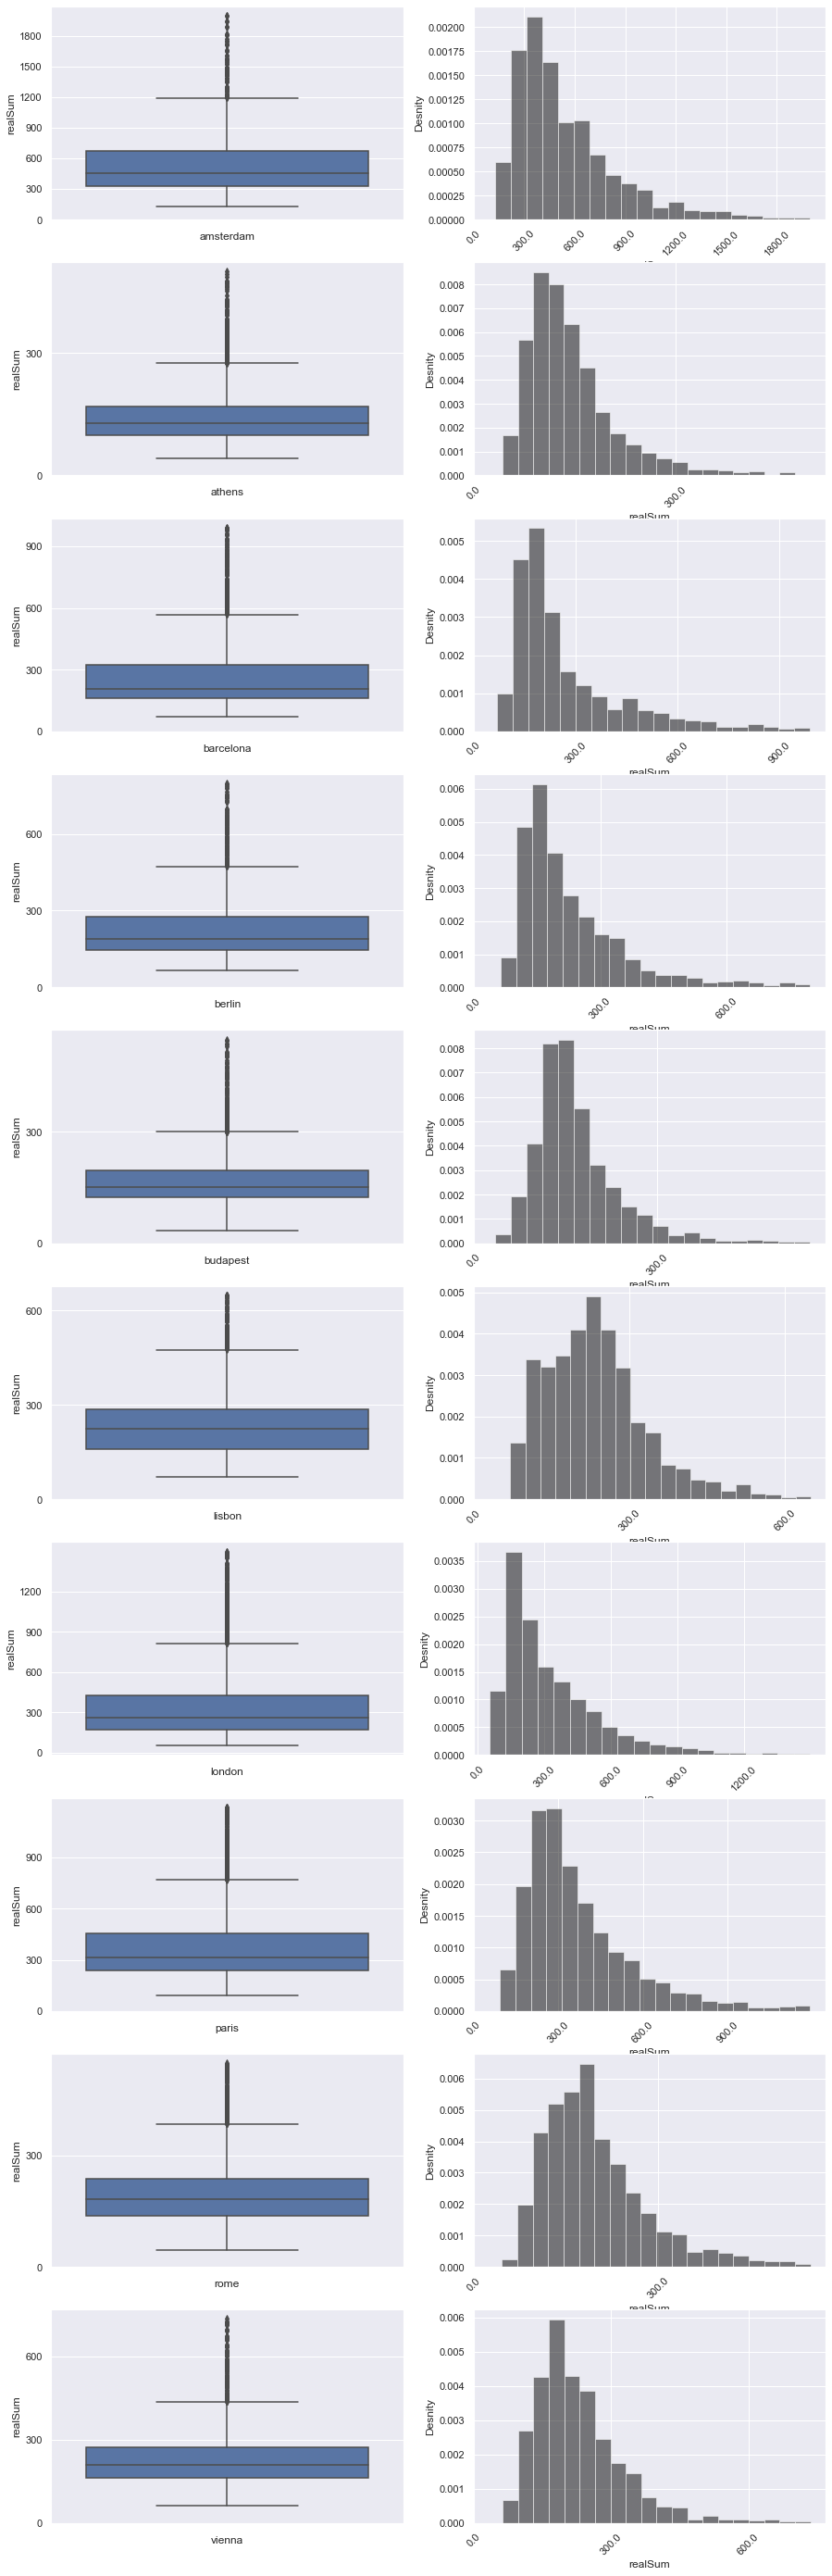

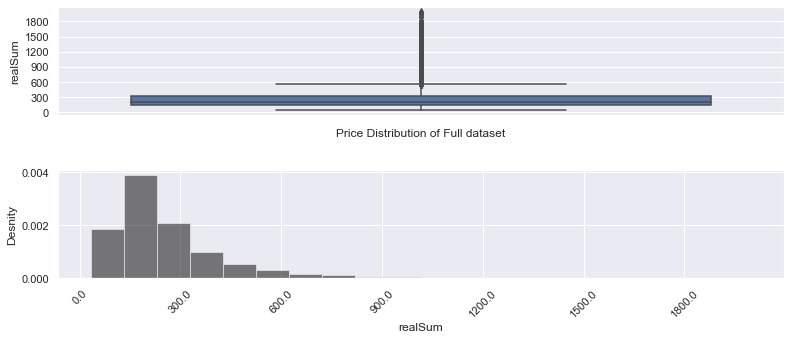

In [43]:
warnings.filterwarnings('ignore')

def plotter_2(city,row):
    sns.boxplot(y='realSum', data=city, ax=axs[row,0])
    axs[row,0].set_yticks(np.arange(0,max(city['realSum']),300))
    axs[row,0].set_xlabel(cities_names[row])
    axs[row,0].set_ylabel('realSum')
    
    axs[row,1].hist(city['realSum'], bins=20, alpha=0.5, color='#000000', density=True)
    axs[row,1].set_xticklabels(np.arange(0,max(city['realSum']),300),rotation=45)
    axs[row,1].set_xticks(np.arange(0,max(city['realSum']),300),rotation=45)
    axs[row,1].set_xlabel('realSum')
    axs[row,1].set_ylabel('Desnity')

plt.figure
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(15, 50))
fig2, axs2 = plt.subplots(nrows=2, ncols=1, figsize=(13, 5))
row = 0
for city in cities_2:
    plotter_2(city,row)
    row = row + 1
row = 0

sns.boxplot(y='realSum', data=data_2, ax=axs2[0])
axs2[0].set_yticks(np.arange(0,max(europe_data_2['realSum']),300))
axs2[0].set_xlabel('Price Distribution of Full dataset')
axs2[0].set_ylabel('realSum')

axs2[1].hist(data_2['realSum'], bins=20, alpha=0.5, color='000000', density=True)
axs2[1].set_xticklabels(np.arange(0,max(europe_data_2['realSum']),300),rotation=45)
axs2[1].set_xticks(np.arange(0,max(europe_data_2['realSum']),300),rotation=45)
axs2[1].set_xlabel('realSum')
axs2[1].set_ylabel('Desnity')
    
plt.subplots_adjust(hspace=0.50)
plt.show()

According to airbnb a superhost is 'The top-rated, most experienced host on Airbnb, committed to providing you with outstanding hospitality', to become one you'll have to meet a range of certain criteria on Airbnb.

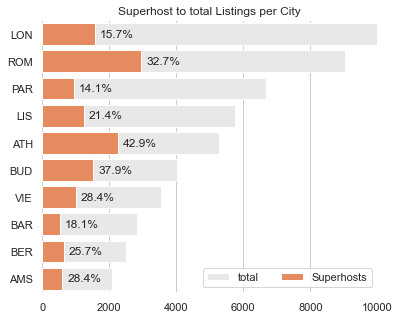

<Figure size 432x288 with 0 Axes>

In [44]:
sns.set_theme(style='whitegrid')

f, ax = plt.subplots(figsize=(6, 5))

sns.set_color_codes('pastel')
sns.barplot(x='realSum', y='abbr', data=listing_superhost_count, label='total', color='#E8E8E8')

sns.set_color_codes('muted')
sns.barplot(x='host_is_superhost', y='abbr', data=listing_superhost_count, label='Superhosts', color='#FC814A')

ax.legend(ncol=2, loc='lower right', frameon=True)
ax.set(xlim=(0,10000), ylabel='', xlabel='')
ax.bar_label(ax.containers[1], labels=listing_superhost_count.perc, label_type='edge', padding=5)
sns.despine(left=True, bottom=True)

plt.title('Superhost to total Listings per City')
plt.show()
plt.clf()

By examining the distributions, we can gain insights into the number of listings per city, as well as the proportion of listings labeled as "superhost" for each city. Notably, the dataset includes a greater number of listings from cities such as London and Rome, while cities like Amsterdam and Berlin are less prevalent.

Further, it appears that Rome and Athens have the highest percentage of "superhosts" among their listings, whereas Paris and London have a relatively low proportion of listings with this designation, with only around 15% of their listings labeled as "superhosts".

In [45]:
data_2_numerical_features = list(europe_data_2.select_dtypes(include=['int64','float64']).columns[i] for i in [1,4,5,6,7,8,9,10,11,12,13,14])

### RELATIONSHIP OF NUMERIC FEATURES WITH PRICE

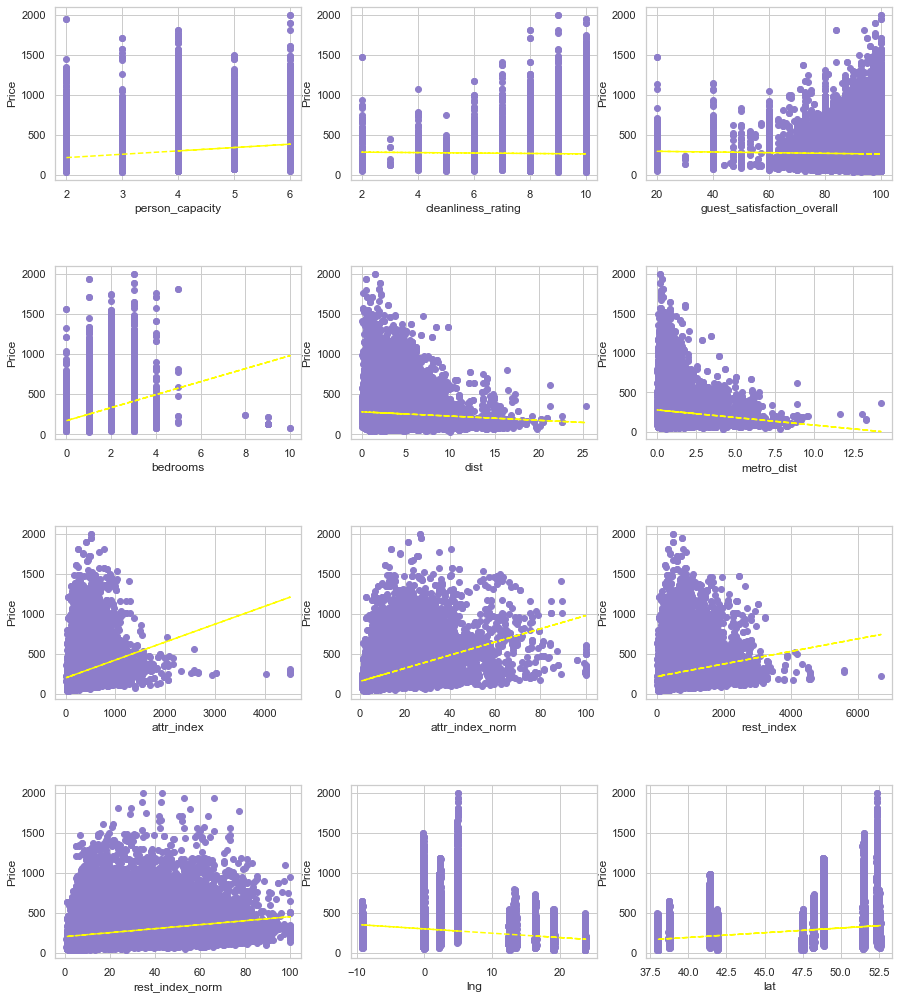

In [47]:
warnings.filterwarnings('ignore')

def plotter_4(feature,color,x,y):
        
    axes[x,y].scatter(y=europe_data_2["realSum"], x=europe_data_2[feature],c=color)
    trend_line = np.poly1d(np.polyfit(europe_data_2[feature], europe_data_2["realSum"], 1))
    axes[x,y].plot(europe_data_2[feature], trend_line(europe_data_2[feature]), "r--",c='yellow')
    axes[x,y].set_ylabel("Price")
    axes[x,y].set_xlabel(feature)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 17.5))
x = 0
y = 0
for i in range(12):
    plotter_4(data_2_numerical_features[i] , '#8d7dca',x,y)
    y  = y + 1
    if y == 3:
        x = x + 1
        y = 0

plt.subplots_adjust(hspace=0.5)


We can see that numbre of bedrooms, person capacity,attraction index & restaurant index are the features have positive relationship with the price. 

Features such as cleanliness rating and guest satisfaction have near to neutral trend lines.

Distance from city centre and nearest metro station have slighly negative trend with price as their value increases.

## CATEGORICAL & BINARY FEATURES

In [48]:
data_2_categorical_features = ['room_type','room_shared','room_private','host_is_superhost','multi','biz','week time']

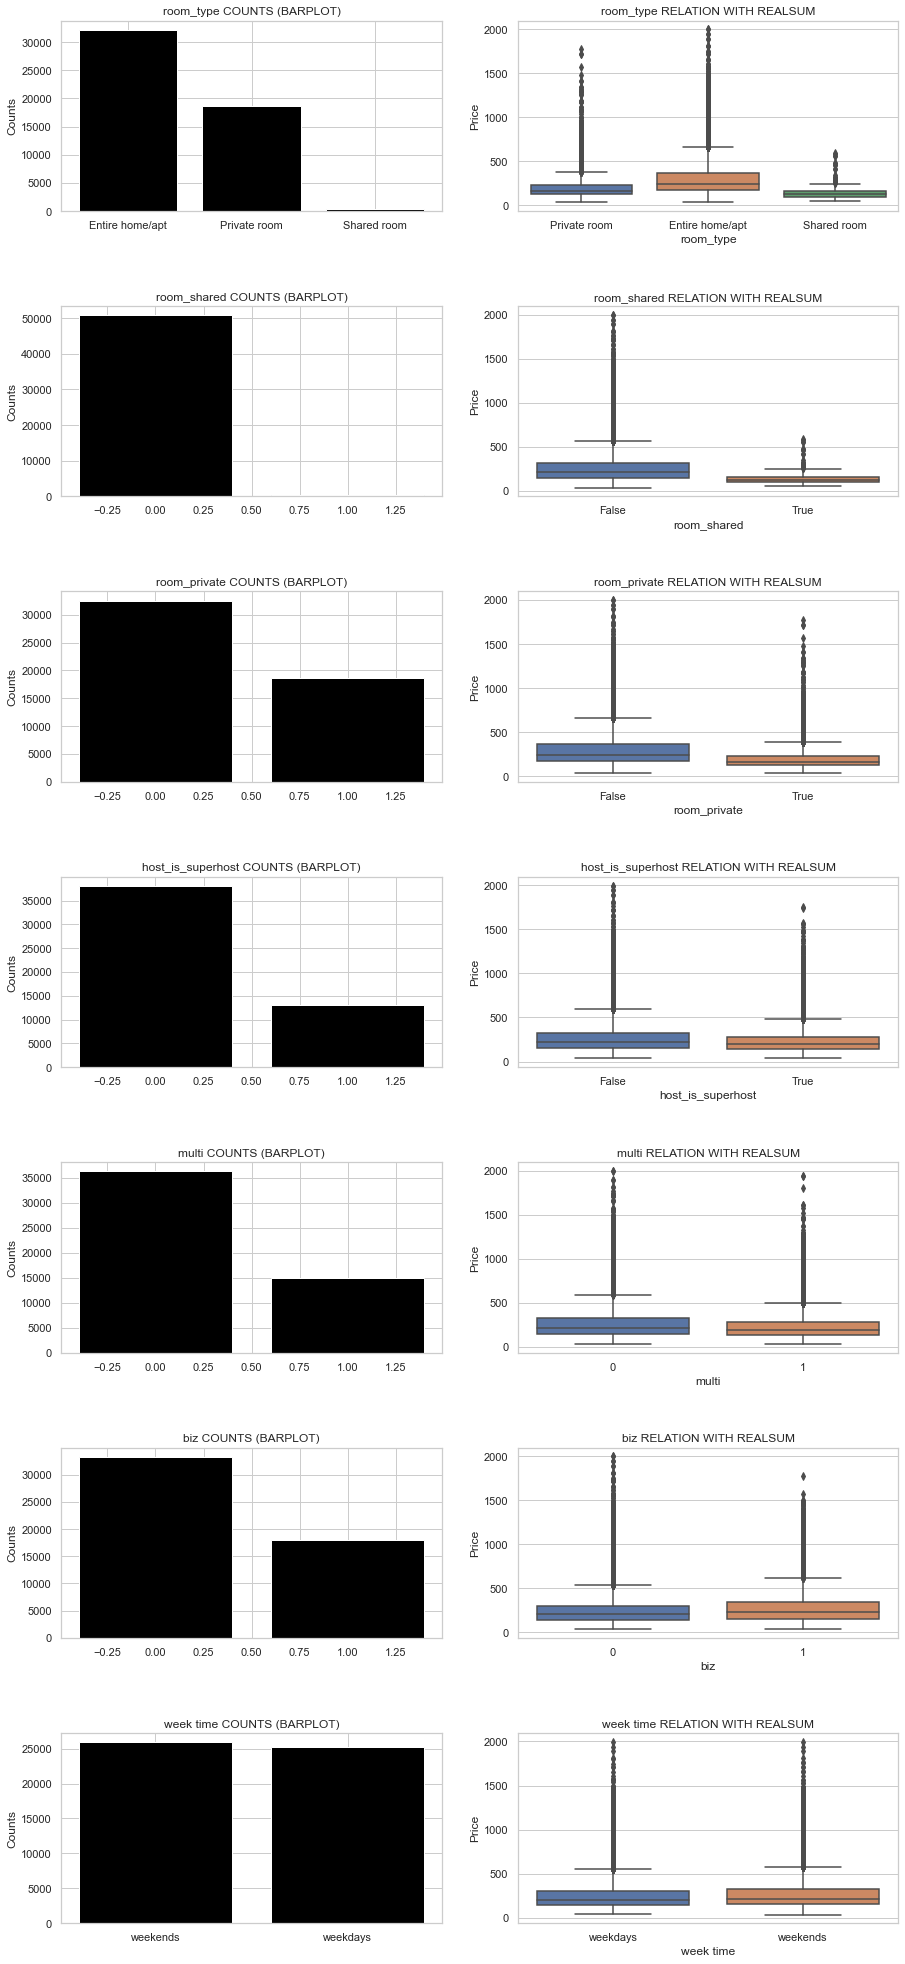

In [50]:
def plotter_5(feature,color,row):
    axes[row,0].bar(x = list(data_2[feature].value_counts().index), height=list(data_2[feature].value_counts().values),color=color)
    axes[row,0].set_ylabel("Counts")
    axes[row,0].set_title(str(feature)+" COUNTS (BARPLOT)")
    
    sns.boxplot(data=data_2,x = feature,y = 'realSum',ax=axes[row,1])
    axes[row,1].set_ylabel("Price")
    axes[row,1].set_title(str(feature)+" RELATION WITH REALSUM")

    
plt.figure
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 35))

for i in range(7):
    plotter_5(data_2_categorical_features[i] , '000000' , i)

plt.subplots_adjust(hspace=0.50)
plt.show()

# DATA PRE-PROCESSING

In [51]:
data_2.head()

realSum     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room        False          True              2.0   
1  344.245776  Private room        False          True              4.0   
2  264.101422  Private room        False          True              2.0   
3  433.529398  Private room        False          True              4.0   
4  485.552926  Private room        False          True              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      1    0                10.0   
1              False      0    0                 8.0   
2              False      0    1                 9.0   
3              False      0    1                 9.0   
4               True      0    0                10.0   

   guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                        93.0  ...  5.022964    2.539380   78.690379   
1                        85.0  ...  0.488389    0.239404  631.176378   
2                        87.0  ...  5.748312    3.651621   75.275877   
3                        90.0  ...  0.384862    0.439876  493.272534   
4                        98.0  ...  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  week time  \
0         4.166708   98.253896         6.846473  4.90569  52.41772   weekdays   
1        33.421209  837.280757        58.342928  4.90005  52.37432   weekdays   
2         3.985908   95.386955         6.646700  4.97512  52.36103   weekdays   
3        26.119108  875.033098        60.973565  4.89417  52.37663   weekdays   
4        29.272733  815.305740        56.811677  4.90051  52.37508   weekdays   

        city  
0  amsterdam  
1  amsterdam  
2  amsterdam  
3  amsterdam  
4  amsterdam  

[5 rows x 21 columns]

In [52]:
data_2.replace({False: 0, True: 1},inplace=True)
data_2.head() # replacing "False/True" of room_shared and room_private

realSum     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room            0             1              2.0   
1  344.245776  Private room            0             1              4.0   
2  264.101422  Private room            0             1              2.0   
3  433.529398  Private room            0             1              4.0   
4  485.552926  Private room            0             1              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0                  0      1    0                10.0   
1                  0      0    0                 8.0   
2                  0      0    1                 9.0   
3                  0      0    1                 9.0   
4                  1      0    0                10.0   

   guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                        93.0  ...  5.022964    2.539380   78.690379   
1                        85.0  ...  0.488389    0.239404  631.176378   
2                        87.0  ...  5.748312    3.651621   75.275877   
3                        90.0  ...  0.384862    0.439876  493.272534   
4                        98.0  ...  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  week time  \
0         4.166708   98.253896         6.846473  4.90569  52.41772   weekdays   
1        33.421209  837.280757        58.342928  4.90005  52.37432   weekdays   
2         3.985908   95.386955         6.646700  4.97512  52.36103   weekdays   
3        26.119108  875.033098        60.973565  4.89417  52.37663   weekdays   
4        29.272733  815.305740        56.811677  4.90051  52.37508   weekdays   

        city  
0  amsterdam  
1  amsterdam  
2  amsterdam  
3  amsterdam  
4  amsterdam  

[5 rows x 21 columns]

### REPLACE CATEGORICAL VLUES TO DUMMY VARIABLES

In [57]:
data_2_categorical_dummies = pd.get_dummies(data_2[['room_type','week time','city']],drop_first=True)
data_3 = pd.concat([data_2_categorical_dummies, data_2.drop(columns=['room_type','week time', 'city'])], axis=1)

In [207]:
europe_data_3

room_type_Private room  room_type_Shared room  week time_weekends  \
0                           1                      0                   0   
1                           1                      0                   0   
2                           1                      0                   0   
3                           1                      0                   0   
4                           1                      0                   0   
...                       ...                    ...                 ...   
51171                       0                      0                   1   
51172                       0                      0                   1   
51173                       0                      0                   1   
51174                       1                      0                   1   
51175                       1                      0                   1   

       city_athens  city_barcelona  city_berlin  city_budapest  city_lisbon  \
0                0               0            0              0            0   
1                0               0            0              0            0   
2                0               0            0              0            0   
3                0               0            0              0            0   
4                0               0            0              0            0   
...            ...             ...          ...            ...          ...   
51171            0               0            0              0            0   
51172            0               0            0              0            0   
51173            0               0            0              0            0   
51174            0               0            0              0            0   
51175            0               0            0              0            0   

       city_london  city_paris  ...  guest_satisfaction_overall  bedrooms  \
0                0           0  ...                        93.0         1   
1                0           0  ...                        85.0         1   
2                0           0  ...                        87.0         1   
3                0           0  ...                        90.0         2   
4                0           0  ...                        98.0         1   
...            ...         ...  ...                         ...       ...   
51171            0           0  ...                       100.0         3   
51172            0           0  ...                        86.0         1   
51173            0           0  ...                        93.0         1   
51174            0           0  ...                        87.0         1   
51175            0           0  ...                        93.0         1   

           dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0      5.022964    2.539380   78.690379         4.166708   98.253896   
1      0.488389    0.239404  631.176378        33.421209  837.280757   
2      5.748312    3.651621   75.275877         3.985908   95.386955   
3      0.384862    0.439876  493.272534        26.119108  875.033098   
4      0.544738    0.318693  552.830324        29.272733  815.305740   
...         ...         ...         ...              ...         ...   
51171  0.530181    0.135447  219.402478        15.712158  438.756874   
51172  0.810205    0.100839  204.970121        14.678608  342.182813   
51173  0.994051    0.202539  169.073402        12.107921  282.296424   
51174  3.044100    0.287435  109.236574         7.822803  158.563398   
51175  1.263932    0.480903  150.450381        10.774264  225.247293   

       rest_index_norm       lng       lat  
0             6.846473   4.90569  52.41772  
1            58.342928   4.90005  52.37432  
2             6.646700   4.97512  52.36103  
3            60.973565   4.89417  52.37663  
4            56.811677   4.90051  52.37508  
...                ...       ...       ...  
51171        10.604584  16.37940  48.211

### CHECKING FOR AND REMOVING REDUNDANT VARIABLES

<AxesSubplot:>

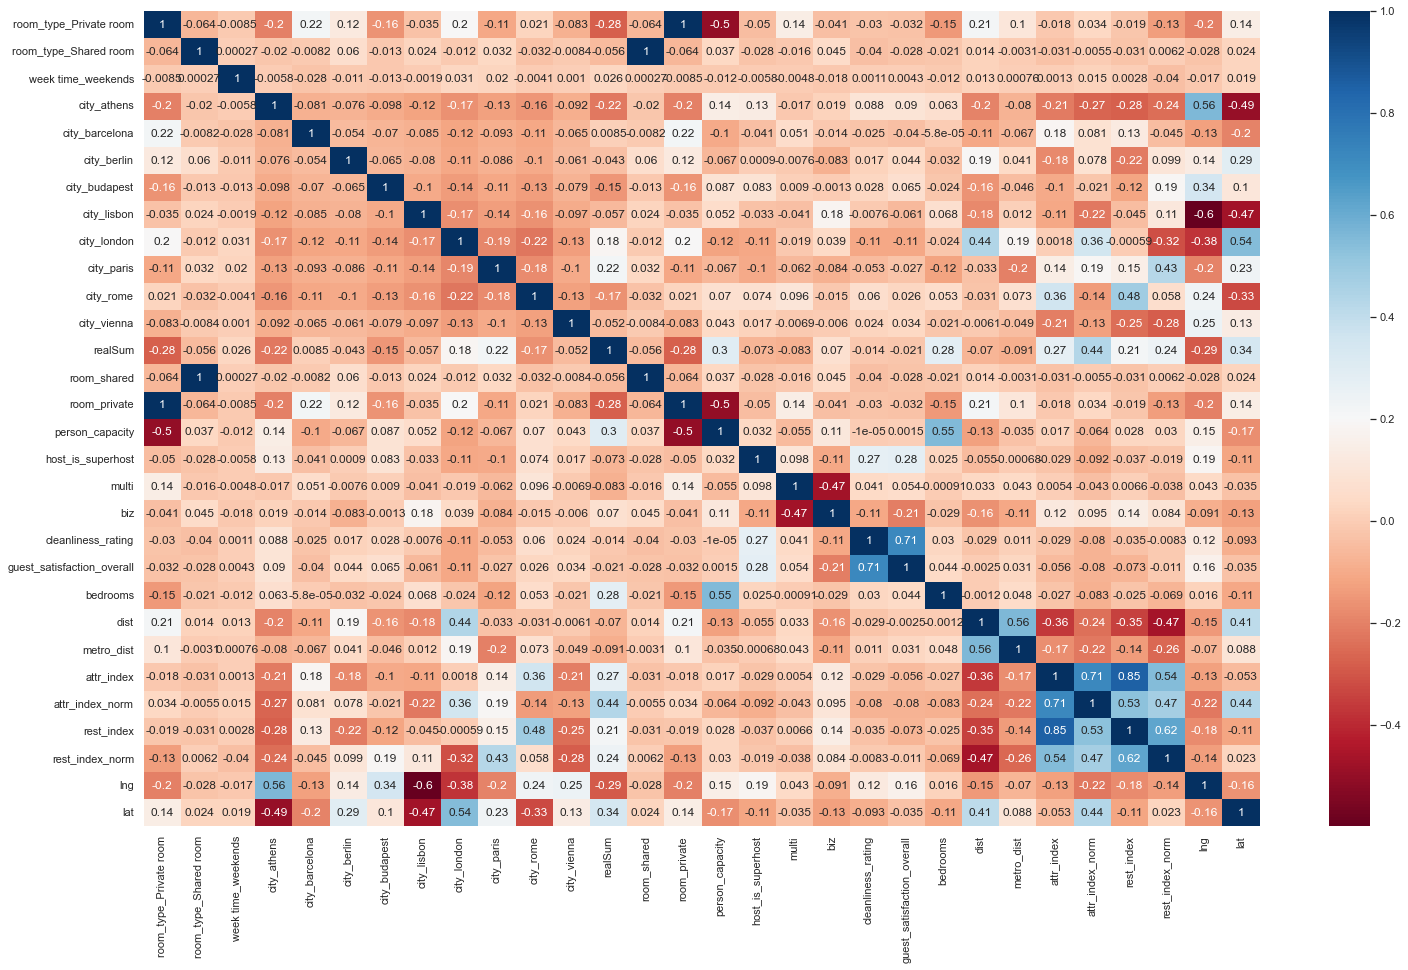

In [58]:
plt.figure
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 15))
sns.heatmap(data_3.corr(),cmap='RdBu',annot=True,ax=axes)

There are certain features in the dataset that exhibit a perfect correlation with each other, which makes them redundant. In such cases, it is safe to remove one of the features. Therefore, we have decided to remove the "room_shared" and "room_private" features from the dataset.

Additionally, we have decided to remove the "rest_index_norm" and "attr_index_norm" features from the dataset at this stage. We will be scaling the data later on when creating the model, and therefore we can safely remove these features for the purpose of analyzing and studying the data.

In [59]:
data_3.drop(columns = ['rest_index_norm','attr_index_norm','room_shared','room_private'],inplace=True)

### COMBINING LATITUDE AND LONGITUDE INTO ONE VARIABLE

In [60]:

def combine_lat_long(lng, lat):
    latitude = np.radians(lat)
    longitude = np.radians(lng)

    amsterdam_latitude = np.radians(0)
    amsterdam_longitude = np.radians(0)

    # apply Haversine formula to compute distance
    latitude_distance = amsterdam_latitude - latitude
    longitude_distance = amsterdam_longitude - longitude
    a = np.sin(latitude_distance/2)**2 + np.cos(latitude) * np.cos(amsterdam_latitude) * np.sin(longitude_distance/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = 6371 * c

    return distance

The function above combines the features latitude and longitude into a single feature

In [64]:
data_3['Haversine Distance'] = combine_lat_long(data_3['lng'],data_3['lat'])

In [213]:
europe_data_3.head()

room_type_Private room  room_type_Shared room  week time_weekends  \
0                       1                      0                   0   
1                       1                      0                   0   
2                       1                      0                   0   
3                       1                      0                   0   
4                       1                      0                   0   

   city_athens  city_barcelona  city_berlin  city_budapest  city_lisbon  \
0            0               0            0              0            0   
1            0               0            0              0            0   
2            0               0            0              0            0   
3            0               0            0              0            0   
4            0               0            0              0            0   

   city_london  city_paris  ...  cleanliness_rating  \
0            0           0  ...                10.0   
1            0           0  ...                 8.0   
2            0           0  ...                 9.0   
3            0           0  ...                 9.0   
4            0           0  ...                10.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        93.0         1  5.022964    2.539380   78.690379   
1                        85.0         1  0.488389    0.239404  631.176378   
2                        87.0         1  5.748312    3.651621   75.275877   
3                        90.0         2  0.384862    0.439876  493.272534   
4                        98.0         1  0.544738    0.318693  552.830324   

   rest_index      lng       lat  Haversine Distance  
0   98.253896  4.90569  52.41772         5846.526443  
1  837.280757  4.90005  52.37432         5841.687430  
2   95.386955  4.97512  52.36103         5840.771088  
3  875.033098  4.89417  52.37663         5841.899872  
4  815.305740  4.90051  52.37508         5841.774808  

[5 rows x 27 columns]

In [65]:
data_3.drop(columns=['lng','lat'],inplace=True)

In [66]:
data_3.head()

room_type_Private room  room_type_Shared room  week time_weekends  \
0                       1                      0                   0   
1                       1                      0                   0   
2                       1                      0                   0   
3                       1                      0                   0   
4                       1                      0                   0   

   city_athens  city_barcelona  city_berlin  city_budapest  city_lisbon  \
0            0               0            0              0            0   
1            0               0            0              0            0   
2            0               0            0              0            0   
3            0               0            0              0            0   
4            0               0            0              0            0   

   city_london  city_paris  ...  multi  biz  cleanliness_rating  \
0            0           0  ...      1    0                10.0   
1            0           0  ...      0    0                 8.0   
2            0           0  ...      0    1                 9.0   
3            0           0  ...      0    1                 9.0   
4            0           0  ...      0    0                10.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        93.0         1  5.022964    2.539380   78.690379   
1                        85.0         1  0.488389    0.239404  631.176378   
2                        87.0         1  5.748312    3.651621   75.275877   
3                        90.0         2  0.384862    0.439876  493.272534   
4                        98.0         1  0.544738    0.318693  552.830324   

   rest_index  Haversine Distance  
0   98.253896         5846.526443  
1  837.280757         5841.687430  
2   95.386955         5840.771088  
3  875.033098         5841.899872  
4  815.305740         5841.774808  

[5 rows x 25 columns]

## SCALING THE FEATURES

In [67]:
Standard_Scaler = StandardScaler()

In [68]:
features_to_scale = ['person_capacity','cleanliness_rating','guest_satisfaction_overall','bedrooms','dist','metro_dist','attr_index','rest_index','Haversine Distance']
features_not_to_scale = ['room_type_Private room', 'room_type_Shared room', 'week time_weekends','city_athens', 
                         'city_barcelona', 'city_berlin', 'city_budapest','city_lisbon', 'city_london', 'city_paris', 
                         'city_rome', 'city_vienna','realSum','host_is_superhost', 'multi', 'biz',]


In [70]:
scaled_features = pd.DataFrame(Standard_Scaler.fit_transform(data_3[features_to_scale]), columns=features_to_scale)
scaled_features.head()

person_capacity  cleanliness_rating  guest_satisfaction_overall  bedrooms  \
0        -0.889640            0.639872                    0.044035 -0.241981   
1         0.663137           -1.453601                   -0.850222 -0.241981   
2        -0.889640           -0.406864                   -0.626657 -0.241981   
3         0.663137           -0.406864                   -0.291311  1.378486   
4        -0.889640            0.639872                    0.602945 -0.241981   

       dist  metro_dist  attr_index  rest_index  Haversine Distance  
0  0.761073    2.155114   -0.959748   -1.060877            1.222122  
1 -1.130383   -0.515641    1.521451    0.430720            1.212497  
2  1.063629    3.446659   -0.975082   -1.066664            1.210675  
3 -1.173566   -0.282851    0.902129    0.506916            1.212920  
4 -1.106878   -0.423570    1.169601    0.386367            1.212671

In [71]:
europe_data_final = pd.concat([scaled_features.reset_index(drop=True),  data_3[features_not_to_scale].reset_index(drop=True)], axis=1)
europe_data_final.head()

person_capacity  cleanliness_rating  guest_satisfaction_overall  bedrooms  \
0        -0.889640            0.639872                    0.044035 -0.241981   
1         0.663137           -1.453601                   -0.850222 -0.241981   
2        -0.889640           -0.406864                   -0.626657 -0.241981   
3         0.663137           -0.406864                   -0.291311  1.378486   
4        -0.889640            0.639872                    0.602945 -0.241981   

       dist  metro_dist  attr_index  rest_index  Haversine Distance  \
0  0.761073    2.155114   -0.959748   -1.060877            1.222122   
1 -1.130383   -0.515641    1.521451    0.430720            1.212497   
2  1.063629    3.446659   -0.975082   -1.066664            1.210675   
3 -1.173566   -0.282851    0.902129    0.506916            1.212920   
4 -1.106878   -0.423570    1.169601    0.386367            1.212671   

   room_type_Private room  ...  city_budapest  city_lisbon  city_london  \
0                       1  ...              0            0            0   
1                       1  ...              0            0            0   
2                       1  ...              0            0            0   
3                       1  ...              0            0            0   
4                       1  ...              0            0            0   

   city_paris  city_rome  city_vienna     realSum  host_is_superhost  multi  \
0           0          0            0  194.033698                  0      1   
1           0          0            0  344.245776                  0      0   
2           0          0            0  264.101422                  0      0   
3           0          0            0  433.529398                  0      0   
4           0          0            0  485.552926                  1      0   

   biz  
0    0  
1    0  
2    1  
3    1  
4    0  

[5 rows x 25 columns]

# REGRESSION MODEL

In [72]:
X_train , X_test , Y_train , Y_test = train_test_split(europe_data_final.drop(columns=['realSum']) , 
                                                       europe_data_final['realSum'],
                                                       random_state=4,
                                                       test_size=0.15)
                                                       

SEQUENTIAL FEATURE SELECTION FUNCTION

In [73]:
def sequential_feature_selection(model,X_train,Y_train,X_test):
    sfs = SequentialFeatureSelector(model,  direction='backward', scoring='r2', cv=5)
    sfs.fit(X_train, Y_train)
    X_train_selected = sfs.transform(X_train)
    X_test_selected = sfs.transform(X_test)
    return X_train_selected, X_test_selected

LINEAR REGRESSION

In [74]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [75]:
lr.score(X_test, Y_test)

0.5867429950894028

 ### Analyzing Results

In [76]:
# get predictions
predictions = lr.predict(X_test)

In [77]:

rmse = mean_squared_error(Y_test, predictions, squared=False) 
mae = mean_absolute_error(Y_test, predictions)


print("R2_score:", round(r2_score(Y_test, predictions),2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.59
RMSE: 114.86845490484916
MAE: 78.9819869128642


- The R2_score value of 0.59 indicates that 59% of the variance in the dependent variable is explained by the independent variables in the model. The higher the R2_score, the better the model fits the data.
- The RMSE value of 114.87 indicates that, on average, the predictions made by the model are about 114.87 units away from the actual values.
- The MAE value of 78.98 indicates that, on average, the predictions made by the model are about 78.98 units away from the actual values.

In [78]:
pd.DataFrame([abs(i) for i in lr.coef_], index=lr.feature_names_in_, columns=['coef']).sort_values('coef', ascending=False).tail(50)

coef
city_budapest               330.177783
city_berlin                 313.300986
city_lisbon                 302.635019
city_barcelona              290.575430
Haversine Distance          234.146491
city_vienna                 223.980150
room_type_Shared room       190.907182
city_london                 147.594336
room_type_Private room      109.492073
city_rome                    48.910160
biz                          35.819793
bedrooms                     34.348743
person_capacity              31.736322
city_paris                   31.282580
attr_index                   27.416341
city_athens                  25.764367
multi                        16.145626
dist                         15.860660
rest_index                   10.541544
cleanliness_rating            8.504013
week time_weekends            7.795975
metro_dist                    5.526606
guest_satisfaction_overall    1.869505
host_is_superhost             1.038868

In [79]:
coef = dict(zip(X_train.columns, lr.coef_))

# sort the dictionary by coefficient value in ascending order
sorted_coef = {k: v for k, v in sorted(coef.items(), key=lambda item: item[1])}

# print the sorted dictionary
print(sorted_coef)

{'city_budapest': -330.17778260899985, 'city_berlin': -313.30098593254445, 'city_vienna': -223.98014977468654, 'room_type_Shared room': -190.90718163743136, 'city_london': -147.59433635094027, 'room_type_Private room': -109.49207301156535, 'city_paris': -31.282580264824645, 'city_athens': -25.764367289643417, 'dist': -15.860659804111013, 'metro_dist': -5.526605514342028, 'host_is_superhost': 1.0388676555357288, 'guest_satisfaction_overall': 1.8695049011106866, 'week time_weekends': 7.795975455029752, 'cleanliness_rating': 8.5040127741438, 'rest_index': 10.541544238255703, 'multi': 16.145626340420215, 'attr_index': 27.416340530892093, 'person_capacity': 31.73632158827851, 'bedrooms': 34.34874287839339, 'biz': 35.819793369732245, 'city_rome': 48.91015964712014, 'Haversine Distance': 234.14649052135894, 'city_barcelona': 290.57542967562307, 'city_lisbon': 302.63501945187716}


In [80]:
coef_table = pd.DataFrame(sorted_coef.items(), columns=['Variable', 'Coefficient'])

# print the table
print(coef_table)

                      Variable  Coefficient
0                city_budapest  -330.177783
1                  city_berlin  -313.300986
2                  city_vienna  -223.980150
3        room_type_Shared room  -190.907182
4                  city_london  -147.594336
5       room_type_Private room  -109.492073
6                   city_paris   -31.282580
7                  city_athens   -25.764367
8                         dist   -15.860660
9                   metro_dist    -5.526606
10           host_is_superhost     1.038868
11  guest_satisfaction_overall     1.869505
12          week time_weekends     7.795975
13          cleanliness_rating     8.504013
14                  rest_index    10.541544
15                       multi    16.145626
16                  attr_index    27.416341
17             person_capacity    31.736322
18                    bedrooms    34.348743
19                         biz    35.819793
20                   city_rome    48.910160
21          Haversine Distance  

# CONCLUSIONS


- The most expensive city is Amsterdam, followed by London and Paris. The cheapest cities are Athens and Budapest.
- The coefficients for cleanliness_rating, rest_index, multi, attr_index, person_capacity, bedrooms, and biz indicate that, on average, accommodations with higher ratings or indexes for these attributes have higher prices.
- The coefficient for Haversine Distance suggests that, on average, accommodations that are farther away from the city center have lower prices.
- The coefficients for host_is_superhost, guest_satisfaction_overall, and week time_weekends indicate that, on average, accommodations with superhost hosts, higher overall guest satisfaction ratings, and those available on weekends have higher prices.
- The coefficients for room_type_Shared room and room_type_Private room indicate that, on average, accommodations with shared rooms and private rooms have lower prices than those with entire apartments/houses.
- Variables such as city_budapest, city_berlin, city_vienna, city_london, city_paris, and city_athens represents different cities where the accommodation is located. The negative values for these variables suggest that, on average, accommodations located in those cities have lower prices than those located in the reference city, Amsterdam. 

